In [3]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test) =  fashion_mnist.load_data()

In [7]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [9]:
import numpy as np

np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [10]:
import matplotlib.pyplot as plt

In [21]:
index = np.where(y_train == 0)[0][0]

1

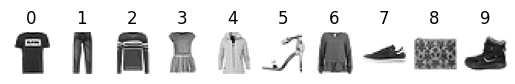

In [23]:
# 각 클래스별 1개씩 10개 그리기
for i in range(10):
  plt.subplot(1,10,i+1)
  index = np.where(y_train == i)[0][0]
  plt.imshow(x_train[index],cmap='gray_r')
  plt.title(y_train[index])
  plt.axis('off')
plt.show()

데이터의 규격을 맞춘다
  - 이미지는 255범위 안에서만 각 픽셀이 표현  / 255

In [24]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

로지스틱 회귀로 패션 아이템을 분류
  - 로지스틱함수(시그모이드)를 적용한 알고리즘
  - LogisticRegression, SGDClassifier

In [25]:
# 교차검증을 통해 두개 모델을 빠르게 성능확인

In [26]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [27]:
lr,sgdc = LogisticRegression(), SGDClassifier()

In [28]:
from sklearn.model_selection import cross_validate

In [29]:
def evalML(estimator,x,y):
  scores = cross_validate(estimator,x,y, return_train_score=True)
  print(scores['train_score'].mean(), scores['test_score'].mean())

In [30]:
evalML(lr,x_train_scaled.reshape(60000,-1),y_train)
evalML(sgdc,x_train_scaled.reshape(60000,-1),y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8680833333333334 0.8563000000000001
0.8628916666666667 0.8454


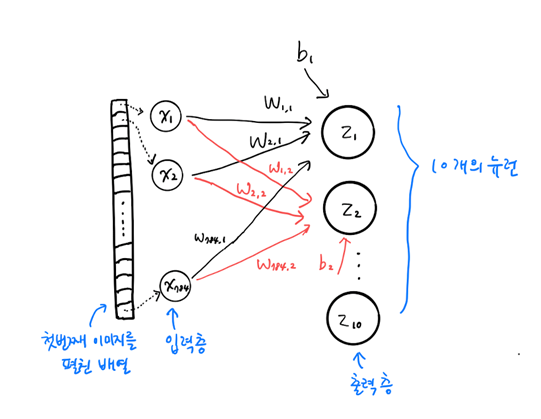

단순신경망:은닉층이 없은 한개의 신경망으로 구성된 모델

In [32]:
from keras.api._v2.keras import activations
# 밀집층을 구성하고
dense = keras.layers.Dense(10,activation='softmax',input_shape=(28*28,))
# 밀집층을 연결해준다.
model = keras.Sequential(dense)

In [39]:
# 이진분류 : binary_crossentropy
# 다중분류 : categorical_crossentropy(타겟이 one-hot이면)
#            타겟이 one-hot으로 인코딩되어 있지 않으면  sparse_categorical_crossentropy
model.compile(loss = "sparse_categorical_crossentropy", metrics='accuracy')

In [40]:
model.fit(x_train_scaled.reshape(-1,28*28),y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5814 - accuracy: 0.8019
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4658 - accuracy: 0.8423
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4439 - accuracy: 0.8485
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4330 - accuracy: 0.8541
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4256 - accuracy: 0.8550


In [41]:
model.fit(x_train_scaled.reshape(-1,28*28),y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4213 - accuracy: 0.8582
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4172 - accuracy: 0.8599
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4146 - accuracy: 0.8603
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4121 - accuracy: 0.8611
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4100 - accuracy: 0.8627


In [43]:
model.evaluate(x_test_scaled.reshape(-1,28*28), y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4613 - accuracy: 0.8453


[0.4612985849380493, 0.845300018787384]

In [50]:
np.argmax(model.predict(x_test_scaled[0].reshape(1,-1) ))


1/1 [==============================] - 0s 22ms/step


9

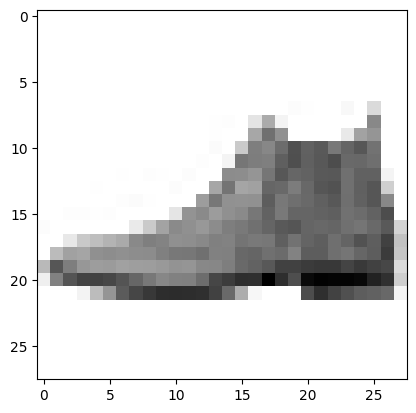

In [51]:
plt.imshow(x_test_scaled[0],cmap='gray_r')

f.npy 에서 읽은 과일 데이터를 분리하는 신경망 모델 만들기

In [52]:
f_data = np.load('f.npy')

In [53]:
f_data.shape

(300, 100, 100)

In [55]:
# 이미지데이터는 255로 나눠서 스케일링 함
# 데이터 나누기(학습,테스트)
# 밀집층(Dense)
# Sequence로 연결해서 모델
# model compile : 학습을 어떻게 할지?(손실함수, 평가방법)
# fit : 학습(epoch 수)
# evaluate : 평가 - 과적합유무
# 예측 : predict

In [57]:
f_data_scaled = f_data / 255.0

In [58]:
f_data_scaled.shape

(300, 100, 100)

In [59]:
target = [0]*100 + [1]*100 + [2]*100

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test =  train_test_split(f_data_scaled,target,random_state=42)
x_train.shape

(225, 100, 100)

In [84]:
Dense = keras.layers.Dense(3,activation = 'softmax',input_shape=(100*100, ))
model = keras.Sequential(Dense)
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [85]:
model.fit(x_train.reshape(-1,100*100),np.array(y_train),epochs=5)

Epoch 1/5
8/8 [==============================] - 1s 6ms/step - loss: 2.3179 - accuracy: 0.4311
Epoch 2/5
8/8 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.6889
Epoch 3/5
8/8 [==============================] - 0s 6ms/step - loss: 0.3273 - accuracy: 0.8889
Epoch 4/5
8/8 [==============================] - 0s 6ms/step - loss: 0.2853 - accuracy: 0.8933
Epoch 5/5
8/8 [==============================] - 0s 5ms/step - loss: 0.0402 - accuracy: 1.0000


In [86]:
model.evaluate(x_test.reshape(-1,100*100),np.array(y_test))

3/3 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 1.0000


[0.04038118198513985, 1.0]